In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import log


df = pd.read_csv('../data/curated/ques2data.csv')

In [2]:
df['Type'].unique()

array(['1 bedroom flat', '2 bedroom flat', '3 bedroom flat',
       '2 bedroom house', '3 bedroom house', '4 bedroom house',
       'All properties', nan], dtype=object)

In [3]:
df['Year'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

In [4]:
df.columns

Index(['suburb', 'Year', 'population', 'income', 'Type', 'Median_Price'], dtype='object')

In [5]:
df = df[df['Type'] == 'All properties']

In [6]:
df.loc[:, 'Median_Price'] = df['Median_Price'].apply(pd.to_numeric, errors='coerce')

In [7]:
df

,suburb,Year,population,income,Type,Median_Price
6,Abbotsford,2016,8843.391594,72463.341789,All properties,450
13,Abbotsford,2017,9360.969572,75929.483052,All properties,450
20,Abbotsford,2018,9595.265665,78784.652725,All properties,475
27,Abbotsford,2019,9661.113233,81883.887314,All properties,495
34,Abbotsford,2020,9738.337037,86715.715407,All properties,490
...,...,...,...,...,...,...
10351,Golden Square,2020,NaN,NaN,All properties,320
10358,Moe,2020,NaN,NaN,All properties,248
10365,Ocean Grove,2020,NaN,NaN,All properties,420
10372,Sale,2020,NaN,NaN,All properties,295


In [8]:
df['Median_Price']

6        450
13       450
20       475
27       495
34       490
        ... 
10351    320
10358    248
10365    420
10372    295
10379    485
Name: Median_Price, Length: 1140, dtype: int64

<AxesSubplot:xlabel='income', ylabel='Median_Price'>

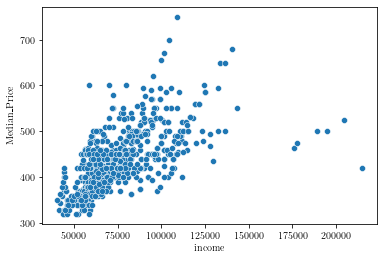

In [9]:
sns.scatterplot(data=df, x='income', y='Median_Price')

In [10]:
df

,suburb,Year,population,income,Type,Median_Price
6,Abbotsford,2016,8843.391594,72463.341789,All properties,450
13,Abbotsford,2017,9360.969572,75929.483052,All properties,450
20,Abbotsford,2018,9595.265665,78784.652725,All properties,475
27,Abbotsford,2019,9661.113233,81883.887314,All properties,495
34,Abbotsford,2020,9738.337037,86715.715407,All properties,490
...,...,...,...,...,...,...
10351,Golden Square,2020,NaN,NaN,All properties,320
10358,Moe,2020,NaN,NaN,All properties,248
10365,Ocean Grove,2020,NaN,NaN,All properties,420
10372,Sale,2020,NaN,NaN,All properties,295


In [11]:
df[df['Type'] == 'All Properties']


,suburb,Year,population,income,Type,Median_Price


In [12]:
df['annual_price_change'] = df.groupby(['suburb', 'Type'])['Median_Price'].apply(pd.Series.pct_change)
df['annual_population_change'] = df.groupby(['suburb', 'Type'])['population'].apply(pd.Series.pct_change)
df['annual_income_change'] = df.groupby(['suburb', 'Type'])['income'].apply(pd.Series.pct_change)

In [13]:
df['invariant'] = 52 * df['Median_Price'] / df['income']

In [14]:
analysed_postcodes = set(pd.read_csv('../data/curated/realestate_with_closest_distance_duration.csv')['postcode'].unique())

In [15]:
df.corr()

,Year,population,income,Median_Price,annual_price_change,annual_population_change,annual_income_change,invariant
Year,1.000000,0.028512,0.139616,0.215700,-0.078731,-0.287824,-0.028419,0.000695
population,0.028512,1.000000,-0.342746,-0.368434,0.016464,0.341528,-0.032324,0.186836
income,0.139616,-0.342746,1.000000,0.633736,0.009652,-0.123294,0.220950,-0.811094
Median_Price,0.215700,-0.368434,0.633736,1.000000,0.054799,-0.070161,-0.087443,-0.183165
annual_price_change,-0.078731,0.016464,0.009652,0.054799,1.000000,0.112754,0.014330,-0.004567
annual_population_change,-0.287824,0.341528,-0.123294,-0.070161,0.112754,1.000000,0.001112,0.137593
annual_income_change,-0.028419,-0.032324,0.220950,-0.087443,0.014330,0.001112,1.000000,-0.222640
invariant,0.000695,0.186836,-0.811094,-0.183165,-0.004567,0.137593,-0.222640,1.000000


In [16]:
df[df['Year'] <= 2020]

,suburb,Year,population,income,Type,Median_Price,annual_price_change,annual_population_change,annual_income_change,invariant
6,Abbotsford,2016,8843.391594,72463.341789,All properties,450,NaN,NaN,NaN,0.322922
13,Abbotsford,2017,9360.969572,75929.483052,All properties,450,0.000000,0.058527,0.047833,0.308181
20,Abbotsford,2018,9595.265665,78784.652725,All properties,475,0.055556,0.025029,0.037603,0.313513
27,Abbotsford,2019,9661.113233,81883.887314,All properties,495,0.042105,0.006863,0.039338,0.314348
34,Abbotsford,2020,9738.337037,86715.715407,All properties,490,-0.010101,0.007993,0.059008,0.293834
...,...,...,...,...,...,...,...,...,...,...
10351,Golden Square,2020,NaN,NaN,All properties,320,0.066667,NaN,NaN,NaN
10358,Moe,2020,NaN,NaN,All properties,248,0.087719,NaN,NaN,NaN
10365,Ocean Grove,2020,NaN,NaN,All properties,420,0.000000,NaN,NaN,NaN
10372,Sale,2020,NaN,NaN,All properties,295,0.053571,NaN,NaN,NaN


In [17]:
df

,suburb,Year,population,income,Type,Median_Price,annual_price_change,annual_population_change,annual_income_change,invariant
6,Abbotsford,2016,8843.391594,72463.341789,All properties,450,NaN,NaN,NaN,0.322922
13,Abbotsford,2017,9360.969572,75929.483052,All properties,450,0.000000,0.058527,0.047833,0.308181
20,Abbotsford,2018,9595.265665,78784.652725,All properties,475,0.055556,0.025029,0.037603,0.313513
27,Abbotsford,2019,9661.113233,81883.887314,All properties,495,0.042105,0.006863,0.039338,0.314348
34,Abbotsford,2020,9738.337037,86715.715407,All properties,490,-0.010101,0.007993,0.059008,0.293834
...,...,...,...,...,...,...,...,...,...,...
10351,Golden Square,2020,NaN,NaN,All properties,320,0.066667,NaN,NaN,NaN
10358,Moe,2020,NaN,NaN,All properties,248,0.087719,NaN,NaN,NaN
10365,Ocean Grove,2020,NaN,NaN,All properties,420,0.000000,NaN,NaN,NaN
10372,Sale,2020,NaN,NaN,All properties,295,0.053571,NaN,NaN,NaN
